In [371]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import numpy as np

In [3]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [5]:
# Hyperparameters
num_epochs = 10 #how many of training cycles to run?
batch_size = 100 #how many records at one time?
learning_rate = 0.001 # how fast can you learn? size of the learning step?

In [7]:
# CIFAR-10 Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [9]:
transform

Compose(
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [11]:
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [13]:
train_dataset

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [15]:
test_dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [201]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [203]:
train_loader

In [205]:
# Define CNN architectures
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [207]:
# Select the model
#model = SimpleCNN().to(device)
model = DeepCNN().to(device)

In [209]:
#SimpleCNN
#DeepCNN

In [211]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [495]:
# Function for training the model
def train_model(model, train_loader):
    model.train()
    loss_list = []
    e_prob_list = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        b_prob_list = []
        for i, (images, labels) in enumerate(train_loader):
            images, labels = images.to(device), labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if (i+1) % 500 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss/500:.4f}")
                loss_list.append(running_loss/500)
                running_loss = 0.0

            # Calculate probabilities
            b_prob_list.append(torch.softmax(outputs, dim=1))

            # Print log probabilities as the model is trained
            #probabilities = torch.softmax(outputs, dim=1)
            #print(f"Epoch {epoch}, Mini Batch {i+1}: Probabilities = {probabilities}")

        e_prob_list.append(b_prob_list)

    #return loss_list #to print the loss in a graph
    return e_prob_list

In [37]:
# Run training on SimpleCNN
#a = train_model(model, train_loader)

In [39]:
# Plot SimpleCNN
#plt.plot(a)
#plt.show()

In [331]:
# Run training on DeepCNN
b = train_model(model, train_loader)

Epoch [1/10], Step [500/500], Loss: 0.2325
Epoch [2/10], Step [500/500], Loss: 0.1981
Epoch [3/10], Step [500/500], Loss: 0.1718
Epoch [4/10], Step [500/500], Loss: 0.1565
Epoch [5/10], Step [500/500], Loss: 0.1313
Epoch [6/10], Step [500/500], Loss: 0.1043
Epoch [7/10], Step [500/500], Loss: 0.0983
Epoch [8/10], Step [500/500], Loss: 0.0858
Epoch [9/10], Step [500/500], Loss: 0.0840
Epoch [10/10], Step [500/500], Loss: 0.0756


In [421]:
len(b), len(b[9]) #10 epochs and 500 records of probability per epoch

(10, 500)

In [479]:
print(np.argmax(b[9][26].detach().numpy()[5]))
for i in range(10):
    print(b[i][26].detach().numpy()[5])

[2.3652698e-11 1.0443104e-11 2.4636110e-04 6.1437800e-05 6.5587543e-08
 4.1769232e-07 9.9969172e-01 5.8498264e-14 1.3121041e-11 3.0327121e-12]
[2.2135113e-12 1.8053407e-12 1.9811529e-05 3.8825488e-06 2.9446730e-06
 1.1999195e-08 9.9997330e-01 4.2532866e-13 1.4317470e-13 7.8457195e-13]
[1.8016756e-12 4.2270709e-13 7.9505571e-06 2.4398953e-06 1.2834515e-07
 2.1382445e-09 9.9998951e-01 3.2414840e-13 1.4819726e-12 5.4985140e-12]
[3.0415744e-14 1.2834994e-13 1.4013418e-06 1.1002478e-06 4.8543884e-11
 4.5781615e-10 9.9999750e-01 1.1011591e-17 1.2974406e-13 2.4861364e-15]
[4.3280432e-16 1.9137580e-14 2.1226692e-06 2.6258141e-07 1.8503798e-10
 1.8681323e-10 9.9999762e-01 3.2406612e-18 4.0720638e-14 2.4549879e-16]
[3.2454565e-16 3.3913905e-15 6.0192271e-08 8.7611187e-07 1.0564695e-11
 9.9994919e-09 9.9999905e-01 2.7459276e-16 6.5524555e-15 1.3506704e-15]
[1.4728958e-13 4.9730012e-13 3.0888001e-05 6.3620980e-08 6.1670569e-10
 5.3891203e-09 9.9996901e-01 4.4124865e-17 1.8368993e-12 8.7186868e-17]

6
[0.9997646, 0.99145705, 0.99954116, 0.95162064, 0.99982774, 0.9996164, 0.9958676, 0.99878556, 0.93887705, 0.9999999]


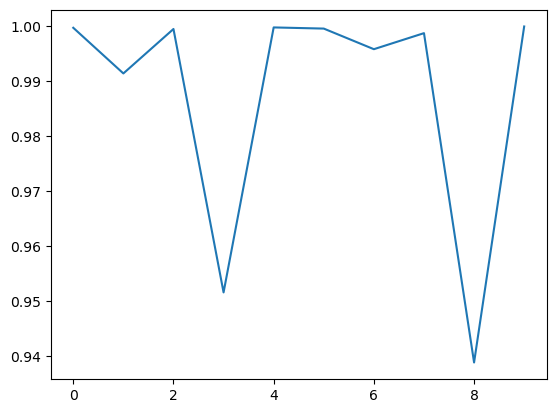

In [497]:
#Find the batch number  (value between 0 and 499) and an image record within a batch (0 to 99)
bat_num = 6 #which batch?
img_ind = 80 #which image within the batch?

#In the last epoch b[9], check the value of output probs and get the max probability index (class)
max_prb_index = np.argmax(b[9][bat_num].detach().numpy()[img_ind])
print(max_prb_index)

#For all epochs for this record, check the probability in the specific class with the max prob index
probs = []
for epoch in b:
    bat = epoch[bat_num]
    img = bat.detach().numpy()[img_ind]
    prb_val = img[max_prb_index]
    probs.append(prb_val)

#plot probs
print(probs)
#print probabilities through training epochs
plt.plot(probs, linestyle="-")
plt.show()

In [63]:
# Plot DeepCNN loss values
#plt.plot(b)
#plt.show()

In [ ]:
#test the model
test_model(model, test_loader)